In [24]:

"""
dataset
--------------------------------------------------------------------------------------------------------------------------------
|                                                                                                                              |
--------------------------------------------------------------------------------------------------------------------------------

normal splitting
--------------------------------------------------------------------------------------------------------------------------------
|                              Train                                                   |      Eval          |     Test         |
--------------------------------------------------------------------------------------------------------------------------------

cross validation
--------------------------------------------------------------------------------------------------------------------------------
|                         |                       |                        |                      |                            |
--------------------------------------------------------------------------------------------------------------------------------



"""

'\ndataset\n--------------------------------------------------------------------------------------------------------------------------------\n|                                                                                                                              |\n--------------------------------------------------------------------------------------------------------------------------------\n\nnormal splitting\n--------------------------------------------------------------------------------------------------------------------------------\n|                              Train                                                   |      Eval          |     Test         |\n--------------------------------------------------------------------------------------------------------------------------------\n\ncross validation\n--------------------------------------------------------------------------------------------------------------------------------\n|                         |           

In [25]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    accuracy_score,
    recall_score
)
warnings.filterwarnings('ignore')

### 1. Loading Data

In [26]:
X_train = np.load('Artifacts/X_train.npz')['arr_0']
Y_train = np.load('Artifacts/Y_train.npz')['arr_0']
X_test = np.load('Artifacts/X_test.npz')['arr_0']
Y_test = np.load('Artifacts/Y_test.npz')['arr_0']

### 2. Configure K-Fold CV

In [27]:
cv = StratifiedKFold(
    n_splits=6,
    random_state=42,
    shuffle=True

)

In [28]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

In [29]:
cv_results = cross_validate(
    model_lr,
    X_train,
    Y_train,
    cv=cv, scoring='accuracy',
    return_train_score=False

)

In [30]:
score_array = ['accuracy','precision','recall','f1']

for score in score_array:
    cv_results = cross_validate(
            model_lr,
            X_train,
            Y_train,
            cv=cv, scoring=score,
            return_train_score=False
                     )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)
    print(f'{score} : {test_score_avg}')

accuracy : 0.7306608765891984
precision : 0.728767491464764
recall : 0.7349241825841353
f1 : 0.7318169755021501


In [31]:
cv_results = cross_validate(
    model_lr,
    X_train,
    Y_train,
    cv=cv, scoring='f1',
    return_train_score=False

)

cv_results

{'fit_time': array([0.00315285, 0.01740336, 0.00800943, 0.0090239 , 0.00770283,
        0.0120995 ]),
 'score_time': array([0.        , 0.00267911, 0.00200343, 0.00199771, 0.00061727,
        0.00286984]),
 'test_score': array([0.73789174, 0.71247059, 0.73377234, 0.74063537, 0.72795851,
        0.7381733 ])}

In [32]:
best_index = np.argmax(cv_results['test_score'])
fold_indeces = list(cv.split(X_train,Y_train))

best_train_idx, best_test_idx = fold_indeces[best_index]
X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [33]:
model_lr = LogisticRegression(
    random_state = 42,
    max_iter=1000
)

model_lr.fit(X_train_best,Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [35]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [36]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6948
Precision: 0.3393
Recall: 0.6569
F1 Score: 0.4475


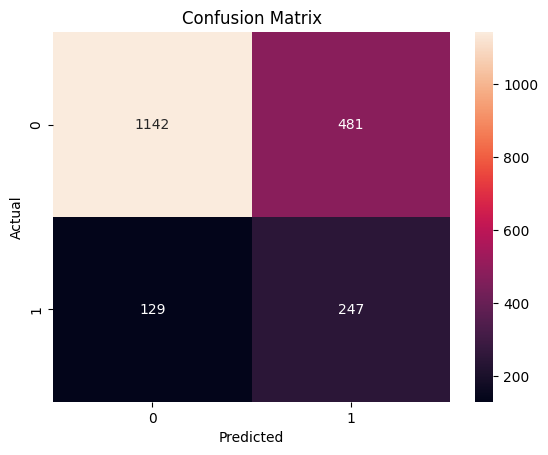

In [37]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()